# COVID-19 Data Analysis

### Code for Sacramento - Spring 2020

## Instructions

1. Install [Jupyter](https://jupyter.org/install) from the command line or with the [Anaconda](https://www.anaconda.com/distribution/) application
2. Verify that Jupyter Notebook was installed; it should start by running `jupyter notebook` from the command line or be visible from Windows Start menu
3. Start Jupyter Notebook; save this notebook and CSV data to your "Documents" folder and navigate to it from the Notebook start page
4. Open this notebook from the start page; file and cells should be viewable

## Introduction

This tutorial demonstrates basic Notebook functionality, Python code required to run examples and features for analysis and visualization. It will require some basic understanding of the Python programming language, Jupyter platform and data analysis; however, we will work through these steps in each section so not to worry! After this tutorial, you should have a basic understanding of Notebook, Python and how to get started with your own notebook.

This tutorial focuses on Exploratory Data Analysis (EDA) of annual traffic delay data from the [CA Open Data Portal](https://data.ca.gov/). Description and details about the dataset are available [here](https://data.ca.gov/dataset/caltrans-annual-vehicle-delay).

Citation: This notebook is based on this Medium article [tutorial](https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190) and [Github Repo](https://github.com/kadnan/EDA_Python/).

## Notebooks for Collaboration

Notebook is a powerful collaborative tool which is open-source and light-weight. It provides all the tools necessary to run data analysis, visualization, statistics and data science [out of the box](https://jupyter.org/jupyter-book/01/what-is-data-science.html). In addition, it's gained acceptance from industry and academia for collaborating on projects and publishing work.

Notebook is a combination of text and code with the programming run-time built into the platform so there is no need to install additional software. The text is in the markdown file format (similar to HTML), and code supports several languages. It is organized by cells which can consist of either text or code; placed together, they can be sent as a single document to share/publish work.

## The Python Programming Language

This tutorial will cover some basic programming, so we will focus on learning the Python programming language for this notebook since it is widely used in industry and has even gained enough traction to be taught in [high school](https://codehs.com/info/curriculum/intropython) and AP Computer Science [courses](https://code.org/educate/curriculum/high-school).

[Notebook](https://jupyter.org/) supports several different languages (R, Scala and Julia); however, Python is the most popular of them and can be used for other tasks, primarily data science and web programming.

## Exercises

If you are new to Jupyter Notebook, then please review the links below:

1. [Intro Guide - DataQuest](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
2. [Intro Guide - DataCamp](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
3. [Notebook Intro - Medium](https://towardsdatascience.com/a-beginners-tutorial-to-jupyter-notebooks-1b2f8705888a)
4. [Data Science Tutorial](https://jupyter.org/jupyter-book/01/what-is-data-science.html)

If you are new to programming or Python, then please review the links below:

1. [Quick Start](https://www.python.org/about/gettingstarted/)
2. [Intro Tutorials](https://realpython.com/learning-paths/python3-introduction/)
3. [Free Code Camp Guide](https://guide.freecodecamp.org/python/)

If you are new to programming or Markdown, then please review the links below:

1. [Quick Start - Github](https://guides.github.com/features/mastering-markdown/)
2. [Quick Start Guide](https://www.markdownguide.org/getting-started/)
3. [Quick Start Tutorial](https://www.markdowntutorial.com/)


## Section 1 - Notebook, Python and Modules

## Open-Source Software (OSS)

Notebook and Python are [open-source software](https://en.wikipedia.org/wiki/Open-source_software) tools, meaning that they are developed and maintained by an open community of contributors instead of closed-source software which is closed to outside development (e.g. Oracle, Apple, Adobe, etc.).

Although opinions abound about which is better, it seems intuitive that a software project would be more robust having more pairs of eyes on it (community) instead of one focused team of developers (closed-source). Many large tech companies such as Google, Amazon and Microsoft recognize this trend so have adopted a [hybrid approach](https://www.wired.com/story/wired-guide-open-source-software/) of basing their products on open-source software.

That said, Notebook and Python are open for public code contributions (with approval by core development team) and have an entire ecosystem of open-source libraries available for use within this notebook via Python modules.

## Exercises

If you are new to Python modules, then please review the links below:

* [Intro to Modules](https://realpython.com/python-modules-packages/)
* [Modules vs. Packages](https://realpython.com/python-modules-packages/)

Please run code cell below with the "run" button located in the top menu.

*Note: If you run into errors, you may need to install a missing module; e.g. [Seaborn](https://seaborn.pydata.org/installing.html) is not included in Anaconda by default.*

In [36]:
# 01 - load Python modules into notebook

# pandas modules for working with dataframes
import pandas as pd

# used to work with datetime
from datetime import datetime

# numpy module for scientific computing (math functions, and pandas is built on numpy)
import numpy as np

# modules for statistical models
import scipy
from scipy import stats
import statsmodels.api as sm

# modules for data visualization
import matplotlib.pyplot as plt

# adjust plot settings to output correctly
%matplotlib inline

# Install a pip package in the current Jupyter kernel; run only for initial install:
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# import sys
# !{sys.executable} -m pip install seaborn==0.9.0
# !{sys.executable} -m pip install --upgrade pip

# seaborn module for plots; built on matplotlib package:
# https://seaborn.pydata.org/
import seaborn as sns; sns.set(color_codes=True)

print('done importing modules')


done importing modules


## Section 2 - Python DataFrames

## DataFrames are the New Spreadsheet

Rather than manually editing and saving spreadsheets, what if there were a tool that could save all those steps, allow for collaboration and make it easy to share/publish your work? Yes, a database could do such a task but how about one which can combine text, publish in multiple formats (pdf, latex, html) and perform data science in a human-readable programming language such as Python? (Sorry, SQL!)

Well, this notebook is that tool and Python DataFrames (via the Pandas module) are the way by which to transform data without having to worry about whether your application (i.e. Excel) will crash and corrupt your source file when working with large datasets.

The links below will provide additional info but in general, data tables are loaded into the notebook and stored as DataFrames and assigned as variables which are like sheets within an Excel file. DataFrames can then be joined, manipulated and transformed programmatically. Rather than linking across a spreadsheet which can become complex and unsustainable over time, DataFrames can be managed and cleaned with organized code (e.g. cells within this notebook).

## Exercises

If you are new to DataFrames, then please review the links below:

* [Intro to DataFrames](https://databricks.com/glossary/what-are-dataframes)
* [DataFrames - DataCamp](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
* [Data Science Notes](https://chrisalbon.com/)

Please run code cells below with the "run" button located in the top menu. Cells will show the following:

* Read in data into a DataFrame
* Convert data type within a DataFrame column
* Print first 5 rows of DataFrame
* Describe the dataset with summary statistics

## Section 2A - Project Objectives

This notebook will focus on COVID-19 data analysis; objectives are as follows:

1. Exploratory data analysis
2. Identify trends
3. Create data visualizations

This notebook is organized by analysis of the datasets listed below. Analysis for each dataset consists of several modules for data import, cleaning, profiling and analysis; datasets are as follows:

### [NYTimes Case Data](https://github.com/nytimes/covid-19-data)

Individual cases prepared by NYTimes journalist staff and updated daily by US county. Data is provided in CSV format; it is an effort to clarify the reports by US states and counties on their case count. Dataset contains total cases as of 04-03-2020.

The source data documentation describes the project is as follows:

> The data is the product of dozens of journalists working across several time zones to monitor news conferences, analyze data releases and seek clarification from public officials on how they categorize cases.


In [37]:
# 02A - Load data into notebook
# Source data: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

# load data into notebook; make sure file is in folder as notebook
df_total = pd.read_csv('data/us-counties.csv')

print("*** dataset info - total cases by US county ***")
print(df_total.info())
print("")

print('*** data shape - total cases by US county ***')
print(df_total.shape)
print('')

print('*** unique values - US state ***')
print(df_total['state'].unique())
print('')

# df.describe(include='all')
# note the `include='all'` argument will include non-numeric columns (e.g. # unique)

# Output summary statistics for dataframe
print('*** summary statistics - total cases by US county ***')
df_total['cases'].describe()


*** dataset info - total cases by US county ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30843 entries, 0 to 30842
Data columns (total 6 columns):
date      30843 non-null object
county    30843 non-null object
state     30843 non-null object
fips      30388 non-null float64
cases     30843 non-null int64
deaths    30843 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB
None

*** data shape - total cases by US county ***
(30843, 6)

*** unique values - US state ***
['Washington' 'Illinois' 'California' 'Arizona' 'Massachusetts'
 'Wisconsin' 'Texas' 'Nebraska' 'Utah' 'Oregon' 'Florida' 'New York'
 'Rhode Island' 'Georgia' 'New Hampshire' 'North Carolina' 'New Jersey'
 'Colorado' 'Maryland' 'Nevada' 'Tennessee' 'Hawaii' 'Indiana' 'Kentucky'
 'Minnesota' 'Oklahoma' 'Pennsylvania' 'South Carolina'
 'District of Columbia' 'Kansas' 'Missouri' 'Vermont' 'Virginia'
 'Connecticut' 'Iowa' 'Louisiana' 'Ohio' 'Michigan' 'South Dakota'
 'Arkansas' 'Delaware' 'Mis

count    30843.000000
mean        59.337937
std        778.748660
min          0.000000
25%          1.000000
50%          4.000000
75%         14.000000
max      57160.000000
Name: cases, dtype: float64

In [38]:
# 02B - data clean and output column names
# Source data: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

# convert string to datetime
# reference: https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a

# index for plot based by date
# indexedDataset = dataset.set_index(['SampleDate'])

df_total['date'] = pd.to_datetime(
    df_total['date'],
    infer_datetime_format=True,
    errors = 'coerce'
)

print("*** confirm data types conversion - datetime ***")
print("")
print(df_total.info())
print("")

# example of converting column data type
# df['cost'] = pd.to_numeric(df['cost'])

# drop null values
# df = df.dropna()

# Remove outlier values, i.e. outside 3 standard deviations
# VMT_is_within_3_standard_deviations = np.abs(df['Annual_VMT'] - df['Annual_VMT'].mean()) <= (3*df['Annual_VMT'].std())
# df = df[VMT_is_within_3_standard_deviations]
# print('Column Dimensions - Excluding Outliers:')
# print(df.shape)
# print("")

# merge clients, entries and exits
# clients_enrollments = pd.merge(df_clients, df_enrollments, on='personal_id')
# enrollments_exits = pd.merge(clients_enrollments, df_exits, on='personal_id')

# filter by state
# https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining
df_california = df_total[df_total['state'] == 'California']

print("*** dataset info - total cases in CA by county ***")
print("")
print(df_california.info())
print("")


*** confirm data types conversion - datetime ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30843 entries, 0 to 30842
Data columns (total 6 columns):
date      30843 non-null datetime64[ns]
county    30843 non-null object
state     30843 non-null object
fips      30388 non-null float64
cases     30843 non-null int64
deaths    30843 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.4+ MB
None

*** dataset info - total cases in CA by county ***

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 5 to 28689
Data columns (total 6 columns):
date      1302 non-null datetime64[ns]
county    1302 non-null object
state     1302 non-null object
fips      1290 non-null float64
cases     1302 non-null int64
deaths    1302 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 71.2+ KB
None



## Section 3 - Data Visualization

## Matplotlib is the New Chart Function

Rather than manually creating and updating charts in Excel, Python (its Matplotlib module) can plot data programmatically so that plots can easily be recreated and manipulated when the data changes. In addition, plot types are not bound by those available on Excel but updated over time from the open-source community. Plots can easily handle large datasets (e.g. > 100k rows) with many more plotting options than in Excel.

The links below will provide additional info but in general, plots are created programmatically by specifying the plot type, dataset and options (if any). Plots are output within the notebook and can also be exported as a separate file (e.g. png or pdf).

## Exercises

If you are new to Matplotlib, then please review the links below:

* [Official Tutorials](https://matplotlib.org/3.1.1/tutorials/index.html)
* [Medium Article](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)
* [Quick Start Guide](https://realpython.com/python-matplotlib-guide/)

Please run code cells below with the "run" button located in the top menu. Cells will show the following:

* How to create a histogram plot
* How to sort a DataFrame
* How to create a box plot

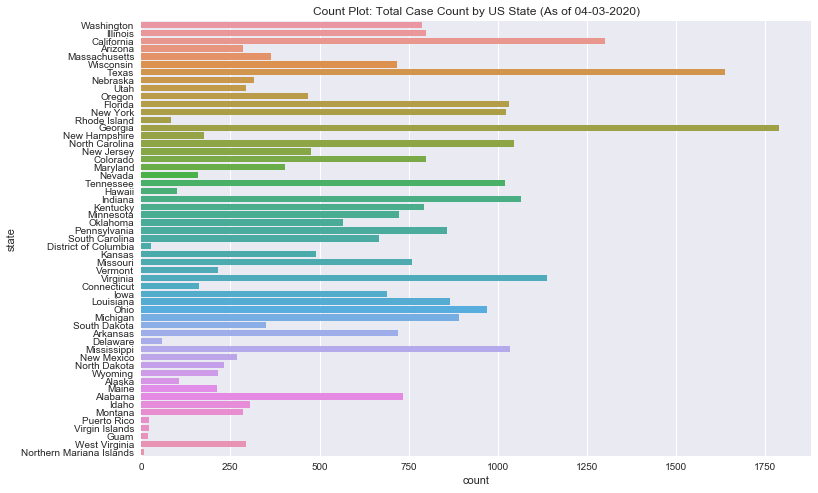

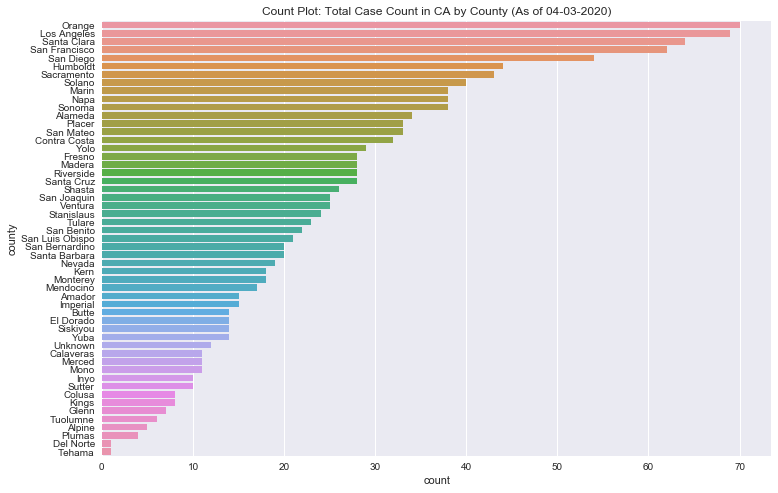

In [39]:
# 03A - create count plot 

# create histogram
# `kde=False` turns off the default density estimate plot
# sns.distplot(clients_enrollments['client_ethnicity'], kde=False)

# set plot size and title
plt.figure(figsize=(12, 8))
plt.title('Count Plot: Total Case Count by US State (As of 04-03-2020)')

# create countplot
sns.countplot(y="state", data=df_total)

# set plot size and title
plt.figure(figsize=(12, 8))
plt.title('Count Plot: Total Case Count in CA by County (As of 04-03-2020)')

# create countplot
sns.countplot(y="county", data=df_california)


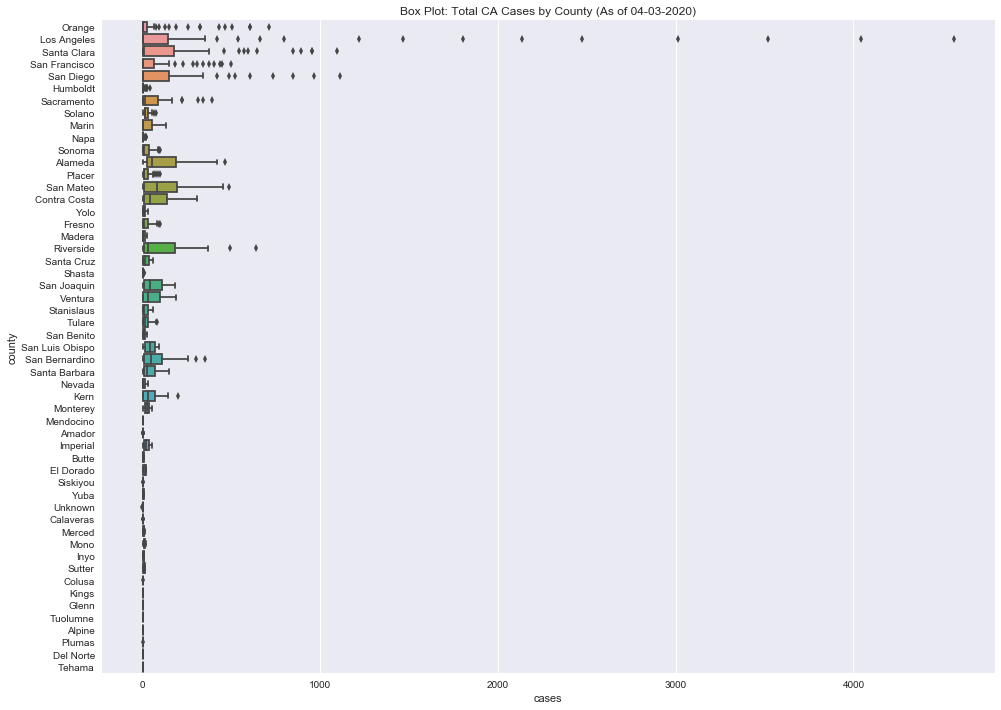

In [40]:
# 03b - create box plots

# set plot size and title
plt.figure(figsize=(16, 12))
plt.title('Box Plot: Total CA Cases by County (As of 04-03-2020)')

# create chart
ax = sns.boxplot(
    y="county",
    x="cases",
    data=df_california
)


## Section 4 - Statistics and Prediction

## Data Science 101

Once we have explored our dataset, examined summary statistics and visualized the dataset, we can analyze the data using statistical functions from the [scipy module](https://www.scipy.org/) and make predictions with the [scikit-learn module](https://scikit-learn.org/stable/). These techniques and models are part of data science, which is a [broad and developing field](https://datascience.berkeley.edu/about/what-is-data-science/) consisting of various steps in managing, storing, analyzing and communicating data.

Statistical and prediction models are typically used to analyze data. For example, in this notebook we fit a linear regression model to analyze the relationship between route incidents and vehicle delay.

The prediction model example in this section is based on this Medium article [tutorial](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)

## Exercises

If you are new to data science, then please review the links below:

1. [Data Science - UC Berkeley](https://datascience.berkeley.edu/about/what-is-data-science/)
2. [Data Science - Edureka](https://www.edureka.co/blog/what-is-data-science/)
3. [Data Scientist - University of Wisconsin](https://datasciencedegree.wisconsin.edu/data-science/what-do-data-scientists-do/)

If you are new to statistics, then please review the links below:

* [OpenIntro Statistics - Free Textbook](https://www.openintro.org/stat/textbook.php?stat_book=os)
* [Advanced HS Statistics - Free Textbook](https://www.openintro.org/stat/textbook.php?stat_book=aps)

If you are new to prediction models or machine learning, then please review the links below:

* [Microsoft Professional Program - Data Analysis](https://academy.microsoft.com/en-us/professional-program/tracks/data-analysis/)
* [Microsoft Professional Program - Data Science](https://academy.microsoft.com/en-us/professional-program/tracks/data-science/)

Please run code cells below with the "run" button located in the top menu. Cells will show the following:

* How to create and plot a linear regression model
* How to create and plot a linear regression prediction model